In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
path_First_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'
path_Second_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Second_Sticker'
path_Third_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Third_Sticker'
path_Fourth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fourth_Sticker'
path_Fifth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'


In [3]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')

Third_Sticker_BackgroundRFactivities = pd.read_csv(path_Third_sticker+'/BackgroundRFactivities.csv')
Third_Sticker_Connected = pd.read_csv(path_Third_sticker+'/Connected.csv')
Third_Sticker_Searching = pd.read_csv(path_Third_sticker+'/Searching.csv')
Third_Sticker_Searching_without_connected = pd.read_csv(path_Third_sticker+'/Searching_without_connecting_to_app.csv')

Fourth_Sticker_BackgroundRFactivities = pd.read_csv(path_Fourth_sticker+'/BackgroundRFactivities.csv')
Fourth_Sticker_Connected = pd.read_csv(path_Fourth_sticker+'/Connected.csv')
Fourth_Sticker_Searching = pd.read_csv(path_Fourth_sticker+'/Searching.csv')
Fourth_Sticker_Searching_without_connected = pd.read_csv(path_Fourth_sticker+'/Searching_without_connecting_to_app.csv')


Fifth_Sticker_BackgroundRFactivities = pd.read_csv(path_Fifth_sticker+'/BackgroundRFactivities.csv')
Fifth_Sticker_Connected = pd.read_csv(path_Fifth_sticker+'/Connected.csv')
Fifth_Sticker_Searching = pd.read_csv(path_Fifth_sticker+'/Searching.csv')
Fifth_Sticker_Searching_without_connected = pd.read_csv(path_Fifth_sticker+'/Searching_without_connecting_to_app.csv')

#Stacking changes the pandas to numpy array

Stacked_BackgroundRFactivities = np.vstack((First_Sticker_BackgroundRFactivities,Third_Sticker_BackgroundRFactivities,
                                            Fourth_Sticker_BackgroundRFactivities,Fifth_Sticker_BackgroundRFactivities))
Stacked_Connected = np.vstack((First_Sticker_Connected,Third_Sticker_Connected,Fourth_Sticker_Connected,Fifth_Sticker_Connected))

Stacked_Searching = np.vstack((First_Sticker_Searching,Third_Sticker_Searching,Fourth_Sticker_Searching,Fifth_Sticker_Searching))

Stacked_Searching_WIFI_Established = np.vstack((First_Sticker_Searching_without_connected,
                                                Third_Sticker_Searching_without_connected,
                                                Fourth_Sticker_Searching_without_connected,
                                                Fifth_Sticker_Searching_without_connected))

In [4]:

I_Data_ALL_BackgroundRFactivities = Stacked_BackgroundRFactivities[0:,0]
Q_Data_ALL_BackgroundRFactivities= Stacked_BackgroundRFactivities[0:,1]

I_Data_ALL_Connected = Stacked_Connected[0:,0]
Q_Data_ALL_Connected = Stacked_Connected[0:,1]

I_Data_ALL_Searching = Stacked_Searching[0:,0]
Q_Data_ALL_Searching = Stacked_Searching[0:,1]

I_Data_ALL_Searching_WIFI_established = Stacked_Searching_WIFI_Established[0:,0]
Q_Data_ALL_Searching_WIFI_established = Stacked_Searching_WIFI_Established[0:,1]



In [5]:
# Sliding window

def sliding_window(Data, window_size, overlap, copy = False):
    sh = (Data.size - window_size + 1, window_size)
    st = Data.strides * 2
    view = np.lib.stride_tricks.as_strided(Data, strides = st, shape = sh)[0::overlap]
    if copy:
        return view.copy()
    else:
        return view


In [6]:
# Creating sliding window Dataset

# 50% Over lapping 
window = 3800
overlap = 1900

I_Background_50_overlap = sliding_window(I_Data_ALL_BackgroundRFactivities,window,overlap)
Q_Background_50_overlap = sliding_window(Q_Data_ALL_BackgroundRFactivities,window,overlap)

I_Connected_50_overlap = sliding_window(I_Data_ALL_Connected,window,overlap)
Q_Connected_50_overlap = sliding_window(Q_Data_ALL_Connected,window,overlap)

I_Searching_50_overlap = sliding_window(I_Data_ALL_Searching,window,overlap)
Q_Searching_50_overlap = sliding_window(Q_Data_ALL_Searching,window,overlap)

I_Searching_WIFI_established_50_overlap = sliding_window(I_Data_ALL_Searching_WIFI_established,window,overlap)
Q_Searching_WIFI_established_50_overlap = sliding_window(Q_Data_ALL_Searching_WIFI_established,window,overlap)


# Concatenating the I Q overlap into a new variable for scaling

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Background_50_overlap,Q_Background_50_overlap),axis=1)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Connected_50_overlap,Q_Connected_50_overlap),axis=1)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Searching_50_overlap,Q_Searching_50_overlap),axis=1)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Searching_WIFI_established_50_overlap,
                                                                       Q_Searching_WIFI_established_50_overlap),axis=1)

print(("Background I" ) + str(I_Background_50_overlap.shape))
print(("Background Q" ) + str(Q_Background_50_overlap.shape))

print(("Connected I" ) + str(I_Connected_50_overlap.shape))
print(("Connected Q" ) + str(Q_Connected_50_overlap.shape))

print(("Searching I" ) + str(I_Searching_50_overlap.shape))
print(("Searching Q" ) + str(Q_Searching_50_overlap.shape))

print(("Searching_WIFI_Established I" ) + str(I_Searching_WIFI_established_50_overlap.shape))
print(("Searching_WIFI_Established Q" ) + str(Q_Searching_WIFI_established_50_overlap.shape))


Background I(7129, 3800)
Background Q(7129, 3800)
Connected I(7129, 3800)
Connected Q(7129, 3800)
Searching I(7129, 3800)
Searching Q(7129, 3800)
Searching_WIFI_Established I(7129, 3800)
Searching_WIFI_Established Q(7129, 3800)


In [7]:
print("BackGround I & Q " + str(Concatenate_IQ_First_BackgroundRFactivities_2Dim.shape))
print("Connected I & Q " + str(Concatenate_IQ_First_Connected_2Dim.shape))
print("Searching I & Q " + str(Concatenate_IQ_First_Searching_2Dim.shape))
print("Searching WIFI established I & Q " + str(Concatenate_IQ_First_Searching_WIFI_established_2Dim.shape))

BackGround I & Q (7129, 7600)
Connected I & Q (7129, 7600)
Searching I & Q (7129, 7600)
Searching WIFI established I & Q (7129, 7600)


In [8]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_First_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_First_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_First_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_First_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_First_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_First_Searching_WIFI_established_2Dim)

In [9]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [10]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (7129, 7604)
Connected dataset shape : (7129, 7604)
Connected dataset shape : (7129, 7604)
Connected dataset shape : (7129, 7604)


[[ 0.68404579 -1.09419687 -0.44452592 ...  0.          0.
   0.        ]
 [-0.98419512 -0.62252453  0.77085669 ...  0.          0.
   0.        ]
 [ 0.69361766 -0.45614696 -0.99340839 ...  0.          0.
   0.        ]
 [ 1.11122485 -1.06808259 -0.26138232 ...  0.          0.
   0.        ]
 [ 1.68827212  0.74214845 -0.86948488 ...  0.          0.
   0.        ]]


[[-0.01370079 -0.01752334 -0.0390753  ...  1.          0.
   0.        ]
 [ 0.07714812  0.09397287  0.07960054 ...  1.          0.
   0.        ]
 [-0.03300409 -0.03250051 -0.01802052 ...  1.          0.
   0.        ]
 [ 0.102956    0.10610156  0.05193305 ...  1.          0.
   0.        ]
 [-0.00760275  0.00264026 -0.02681362 ...  1.          0.
   0.        ]]


[[-5.78074174e-01 -6.79868257e-01  1.03296040e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 

In [11]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)


Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:7600]
print("Training Data Set shape " + str(Train_Dataset.shape))
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,7600:]
print(Y_Train_Dataset)

25664
Training Data Set shape (19961, 7600)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [12]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:7600]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,7600:]
print(Validation_Dataset.shape)

(5703, 7600)


In [14]:
Train_Dataset=Train_Dataset.reshape(19961,7600,1)
Validation_Dataset=Validation_Dataset.reshape(5703,7600,1)
print(Validation_Dataset.shape)

(5703, 7600, 1)


In [16]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 100
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(7600,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7591, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7582, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2527, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2518, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2509, 160)         256160    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)              

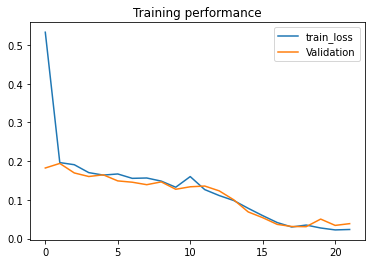

In [17]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [19]:
model_m.save("{Slider_50_Model} ALL_Sticker_TRAINED")

INFO:tensorflow:Assets written to: {Slider_50_Model} ALL_Sticker_TRAINED/assets
